# MURA

- Masaryk University Repository Analyzer

This tool was created as a part of the thesis "Measuring Software Development Contributions using Git" thesis at Masaryk University.
The goal of this tool is to analyze git repositories of students and provide useful information to teacher about their work.

The implementation is originally written in Python 3.9 and uses the following libraries:
- [GitPython](https://gitpython.readthedocs.io/en/stable/) - for git operations
- [matplotlib](https://matplotlib.org/) - for plotting
- [jupyter](https://jupyter.org/) - for interactive development and the frontend of the tool

Below are the necessary imports for the tool to work. As well as wide-screen support for the Jupyter notebook.

In [1]:
import os
import sys
import fs_access as file_system
import lib
import mura
import configuration
import semantic_analysis

from uni_chars import *
from history_analyzer import CommitRange

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

# Configuration

In [67]:
configuration.open_configuration_folder()


Configuration is split into multiple files each grouping settings for a specific part of the tool.

## Configuration file
- `configuration_data/configuration.txt` - contains general configuration of the tool
- `lang-syntax/*` - contains weight definitions for general syntax of a language
- `lang-semantics/*` - contains weight definitions for semantic constructs
- `remote-repo-weigths/weights.txt` - contains weight definitions for remote repository objects

## Rules file

- `configuration_data/rules.txt` - contains rules for the tool

Once the configuration is set, run the code block below to load the configurations into the tool.

In [ ]:
config = configuration.validate()

# Contributors

Often times contributors do not have a synchronized git configuration across all development devices. This can lead to the tool not being able to properly identify the contributors. The tool attempts to match contributors by their name and email. If that is not enough an explicit name-to-name mapping can be provided in the `contributor_map` variable.

In [17]:
contributor_map = \
[
    # ('Jiří Šťastný', 'Jiri Stastny'),
    ('Matěj Gorgol', 'Matej Gorgol')
]

config.contributor_map = contributor_map

# Repository

Put the path to the repository you want to analyze into the `repo_path` variable and run the code block below.

In [18]:
repository_path = r"C:\MUNI\last\Java\M1\airport-manager"

repository = file_system.validate_repository(repository_path, config)

✅ Repository path 'C:\MUNI\last\Java\M1\airport-manager' points to a repository
ℹ️ Remote repository found: https://gitlab.fi.muni.cz/xstys/airport-manager (GitLabRepository)
✅ GitLab access token validated successfully!


# Commit range

The commit range is defined by the `start` and `end` variables. The variables can be either a commit hash or a tag/branch name.
Additionally, the `end` variable can be set to `ROOT` and `start` to `HEAD` to analyze the repository from the beginning to the current state.

In [19]:
start = "HEAD"
end = "ROOT"

commit_range = CommitRange(start, end)

✅ Commit range: 921737c398c70e065c41a2799f6fd998484f1871...bcdfbfd57c8f3cd6cd65998464bb71a562d49948
 - Final commit by: 'Kryštof-Mikuláš Štys', (2023-03-26 23:53:22+02:00)
 - Initial commit by: 'GitLab', (2019-03-06 09:52:24+01:00)


# Analysis

The analysis is a time-consuming process. Taking longer the larger the repository is. For a single project from the PA165 course, the analysis took about 25 seconds on an Intel i7-12700H CPU.

In [20]:
tracked_files = lib.get_tracked_files()

history_analysis_result = commit_range.analyze()

semantic_analysis_grouped = []
for group in tracked_files:
    grouped_semantic_weight = semantic_analysis.compute_semantic_weight_grouped(group)
    semantic_analysis_grouped.append(grouped_semantic_weight)

ℹ️ Using implicit project at: C:\MUNI\last\Java\M1\airport-manager.


# Results

The analysis part is finished. The tool provides multiple outputs to help the teacher analyze the students' work. Each output is a separate function code block.

## Contributors

In [34]:
contributors = mura.display_contributor_info(commit_range,config)

👨‍💻 Contributors:

Jan Sýkora <xsykora4@fi.muni.cz> (['Jan Sýkora <485598@muni.cz> ([])'])
Matej Gorgol <56208414+Mateorid@users.noreply.github.com> (['Matěj Gorgol <xgorgol@fi.muni.cz> ([])'])
Kryštof-Mikuláš Štys <xstys@fi.muni.cz> (['Kryštof-Mikuláš Štys <493159@mail.muni.cz> ([])'])
Tomáš Tomala <xtomala@fi.muni.cz> (['Tomáš Tomala <tomalatms@gmail.com> ([])'])
Tereza Vrabcová <xvrabcov@ACER-TRAVEL.localdomain> (['Tereza Vrabcová <xvrabcov@fi.muni.cz> ([])'])
GitLab <root@localhost> ([])


## Commits

In [35]:
commit_distribution = mura.commit_info(commit_range, repository, contributors)

⬆️ Total commits: 141

Commit: bcdfbfd57c8f3cd6cd65998464bb71a562d49948 by GitLab
Commit: 3bd69e8ac00bd50222abac313a5b47c14a437606 by Kryštof-Mikuláš Štys
Commit: a1b77e34d5b39941b8a713f3a9e3bf8875e7d52b by Kryštof-Mikuláš Štys
Commit: 448c12e92d4e52a0c6b3078c16f0f29e601cfbc4 by Kryštof-Mikuláš Štys
Commit: 21d2e3574f488b91e5e210dc94b24fa434dd1b4c by Kryštof-Mikuláš Štys
Commit: aca8c18a5a3e728f01d2f9d4e4e18c5f62322f3a by Kryštof-Mikuláš Štys
Commit: e183ad948e47f0d5306505abf92395b3cbbcb4f1 by Kryštof-Mikuláš Štys
Commit: 3500a9160488e9c2766fee815b49f3bcc8923efb by Kryštof-Mikuláš Štys
Commit: 770643095e335002c031ec340f1fb8d3f85ef18a by Kryštof-Mikuláš Štys
Commit: e61930eb55e22f8d683e18ee430b342a99f50528 by Kryštof-Mikuláš Štys
Commit: 77005c6809334d6c05b8dd60a6ac3519b3a457b6 by Kryštof-Mikuláš Štys
Commit: e75e1d0d7826f5cafa9b975f83dd20704f3c8120 by Kryštof-Mikuláš Štys
Commit: 000adaedb74589df7097eec2b2a805679b234994 by Kryštof-Mikuláš Štys
Commit: ed81eb282b900b931da21968c97f201584

## Commit graph

Displays a graph of the commits in the repository. The range of the x-axis is computed from the starting commit date and the ending commit date.
To display only a section of the graph, the list can be sliced. This is generally useful when there are commits at the boundaries. Taking a section in the middle does not make much sense.

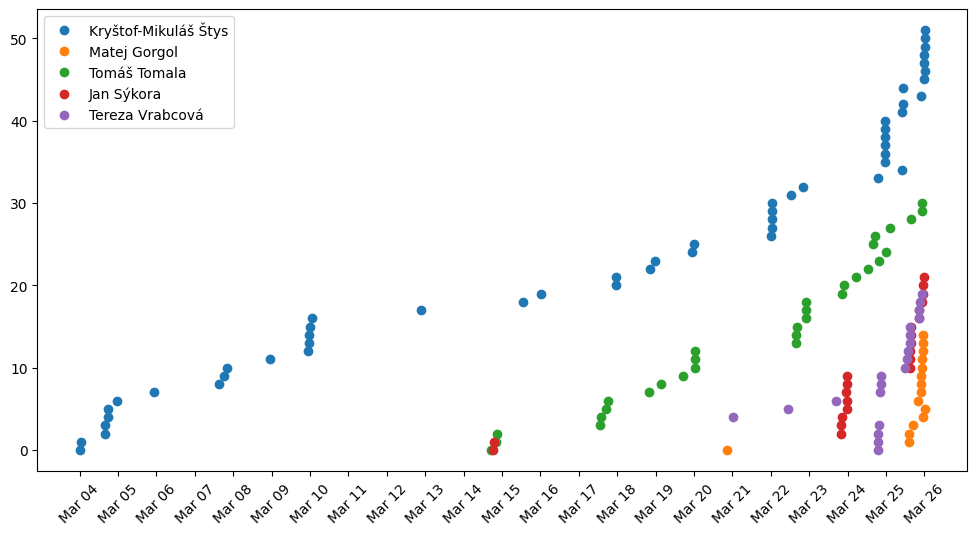

In [36]:
commits = [commit for commit in commit_range]

commits = commits[1:] # remove first commit
# commits = commits[:10] # remove last 10 commits

mura.plot_commits(commits, contributors, repository, force_x_axis_labels=False)

## File statistics

First part of the output is a combined statistics of all file changes in the repository.

- A: Added
- D: Deleted
- M: Modified
- R: Renamed

In [53]:
flagged_files = mura.file_statistics_info(commit_range, contributors)

👨‍💻 Jan Sýkora <xsykora4@fi.muni.cz> (['Jan Sýkora <485598@muni.cz> ([])']))
 => A - 58
 => R - 22
 => D - 4
 => M - 31
👨‍💻 Matej Gorgol <56208414+Mateorid@users.noreply.github.com> (['Matěj Gorgol <xgorgol@fi.muni.cz> ([])']))
 => A - 121
 => R - 2
 => D - 10
 => M - 42
👨‍💻 Kryštof-Mikuláš Štys <xstys@fi.muni.cz> (['Kryštof-Mikuláš Štys <493159@mail.muni.cz> ([])']))
 => A - 238
 => R - 8
 => D - 21
 => M - 184
👨‍💻 Tomáš Tomala <xtomala@fi.muni.cz> (['Tomáš Tomala <tomalatms@gmail.com> ([])']))
 => A - 47
 => R - 21
 => D - 4
 => M - 86
👨‍💻 Tereza Vrabcová <xvrabcov@ACER-TRAVEL.localdomain> (['Tereza Vrabcová <xvrabcov@fi.muni.cz> ([])']))
 => A - 111
 => R - 1
 => D - 0
 => M - 64
👨‍💻 GitLab <root@localhost> ([]))
 => A - 6
 => R - 0
 => D - 0
 => M - 0


## Percentages and ownership

In [37]:
percentage, ownership = mura.percentage_info(history_analysis_result, contributors, config)

📊 Percentage of tracked files:

	Kryštof-Mikuláš Štys: 30.91%
	GitLab: 2.88%
	Tomáš Tomala: 18.89%
	Tereza Vrabcová: 23.42%
	Matej Gorgol: 2.63%
	Matěj Gorgol: 12.21%
	Jan Sýkora: 9.07%
Files owned by 👨‍💻 Kryštof-Mikuláš Štys
	.gitignore (0.29411764705882354)
	.mvn\wrapper\maven-wrapper.properties (1)
	mvnw (0.30914826498422715)
	mvnw.cmd (0.31216931216931215)
	steward-module\.mvn\wrapper\maven-wrapper.properties (1)
	steward-module\mvnw (1)
	steward-module\mvnw.cmd (1)
	steward-module\pom.xml (1)
	steward-module\src\main\java\cz\muni\fi\pa165\airportmanager\stewardmodule\StewardModuleApplication.java (1)
	steward-module\src\main\java\cz\muni\fi\pa165\airportmanager\stewardmodule\data\model\Steward.java (1)
	domain-module\.gitignore (1)
	domain-module\.mvn\wrapper\maven-wrapper.properties (1)
	domain-module\mvnw (1)
	domain-module\mvnw.cmd (1)
	domain-module\pom.xml (1)
	domain-module\src\main\java\cz\muni\fi\pa165\airportmanager\domainmodule\data\model\DomainEntity.java (1)
	domain-mo

## Ownership as a directory tree

In [38]:
mura.display_dir_tree(percentage, repository)

📁 Dir Tree with ownership:

├── .gitignore 👨‍💻 [Kryštof-Mikuláš Štys: 29%, GitLab: 71%]
├── .mvn
│   └── wrapper
│       └── maven-wrapper.properties 👨‍💻 [Kryštof-Mikuláš Štys: 100%]
├── README.md 👨‍💻 [Tomáš Tomala: 100%]
├── mvnw 👨‍💻 [GitLab: 69%, Kryštof-Mikuláš Štys: 31%]
├── mvnw.cmd 👨‍💻 [GitLab: 69%, Kryštof-Mikuláš Štys: 31%]
├── pom.xml 👨‍💻 [Tomáš Tomala: 28%, Kryštof-Mikuláš Štys: 17%, Tereza Vrabcová: 26%, Matej Gorgol: 5%, Matěj Gorgol: 8%, Jan Sýkora: 4%, GitLab: 12%]
├── steward-module 👨‍💻 [Kryštof-Mikuláš Štys: 98%, Tomáš Tomala: 1%, Matěj Gorgol: 1%]
│   ├── .mvn
│   │   └── wrapper
│   │       └── maven-wrapper.properties 👨‍💻 [Kryštof-Mikuláš Štys: 100%]
│   ├── mvnw 👨‍💻 [Kryštof-Mikuláš Štys: 100%]
│   ├── mvnw.cmd 👨‍💻 [Kryštof-Mikuláš Štys: 100%]
│   ├── pom.xml 👨‍💻 [Kryštof-Mikuláš Štys: 100%]
│   └── src 👨‍💻 [Kryštof-Mikuláš Štys: 92%, Tomáš Tomala: 4%, Matěj Gorgol: 4%]
│       ├── main 👨‍💻 [Kryštof-Mikuláš Štys: 94%, Tomáš Tomala: 4%, Matěj Gorgol: 2%]
│       │   

## Rules

In [46]:
mura.rule_info(config, ownership)

📜 Rules: 

All contributors must have at least 1 file/s matching: `.*Controller.*\.java` in a directory matching: `*`

🚫 Violated Rules: 

❌ Contributor GitLab <root@localhost> ([]) did not fulfill the following requirements:
	All contributors must have at least 1 file/s matching: `.*Controller.*\.java` in a directory matching: `*`


## Syntax

In [40]:
syntactic_weights = mura.syntax_info()

📖 Syntax:

ℹ️ TODO


## Semantics

In [41]:
semantic_weights = mura.semantic_info(tracked_files, ownership, semantic_analysis_grouped)

📚 Semantics:

📦 Group: C:\MUNI\last\Java\M1\airport-manager
Total files: 6
Total weight: 0.0
📦 Group: C:\MUNI\last\Java\M1\airport-manager\.mvn\wrapper
Total files: 1
Total weight: 0.0
📦 Group: C:\MUNI\last\Java\M1\airport-manager\airlines-module
Total files: 4
Total weight: 0.0
📦 Group: C:\MUNI\last\Java\M1\airport-manager\airlines-module\.mvn\wrapper
Total files: 1
Total weight: 0.0
📦 Group: C:\MUNI\last\Java\M1\airport-manager\airlines-module\src\main\java\cz\muni\fi\pa165\airportmanager\airlinesmodule
Total files: 1
File: AirlinesModuleApplication.java: Owner: Matej Gorgol
Contents: Classes: 1 Functions: 1 Properties: 0 Fields: 0 Comments: 0 
Total semantic weight: 58.0
Total weight: 58.0
📦 Group: C:\MUNI\last\Java\M1\airport-manager\airlines-module\src\main\java\cz\muni\fi\pa165\airportmanager\airlinesmodule\data\model
Total files: 1
File: Airline.java: Owner: Matej Gorgol
Contents: Classes: 1 Functions: 8 Properties: 0 Fields: 2 Comments: 1 
Total semantic weight: 73.5
Total weig

## Remote repository

In [42]:
issue_weights, pull_request_weights = mura.remote_info(commit_range, repository, config, contributors)

🌐 Remote repository:

Project: Airport Manager
📋 Total issues: 10
🔄 Total pull requests: 16
👨‍💻 Total contributors: 6
📋 Issue: Artifacts creation only for develop - by Kryštof-Mikuláš Štys

Description: - [ ] Check if the artefact issue really is due to the number of artefacts or just due to the size of our artefact.
- [ ] Find a good solution for artefacts only in master/ develop.
State: opened
ℹ️ Issue was not closed during the period or did not exist at all.
Weight 0.0 - Beneficiaries: Kryštof-Mikuláš Štys
📋 Issue: make repo update & delete throw exception - by Matěj Gorgol

Description: updateEntity & deleteEntity in DomainRepository should throw exception when trying to update/delete nonexisting/null object

update the tests as well!
State: opened
ℹ️ Issue was not closed during the period or did not exist at all.
Weight 0.0 - Beneficiaries: Matej Gorgol
📋 Issue: Use mocks in tests - by Matěj Gorgol

Description: Write better tests using mocks
State: opened
Assignee: Matěj Gorgol
ℹ

## Summary

In [45]:
print(f"{INFO} TODO")

ℹ️ TODO
